### Edge Types

### Setup

In [1]:
import sys
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

%matplotlib inline

In [2]:
DATA_DIR = "../data/wsdm-2022"

print("FILES")
print(sorted(os.listdir(f"{DATA_DIR}/train")))
print(sorted(os.listdir(f"{DATA_DIR}/test")))

FILES
['edge_type_features.csv', 'edges_train_A.csv', 'edges_train_B.csv', 'node_features.csv']
['input_A.csv', 'input_A_initial.csv', 'input_B.csv', 'input_B_initial.csv']


In [3]:
edge_list = pd.read_csv(
    f"{DATA_DIR}/train/edges_train_A.csv",
    header=None,
    names=['src_id', 'dst_id', 'edge_type', 'timestamp'],
    dtype={'src_id': str, 'dst_id': str, 'edge_type': str, 'timestamp': int},
).sort_values('timestamp')

In [4]:
print(f"EDGEs: {len(edge_list)}")
edge_list.head()

EDGEs: 27045268


,src_id,dst_id,edge_type,timestamp
0,106,28905,96,1413662400
904,28905,5776,33,1413662400
903,28905,5502,69,1413662400
902,28905,5450,237,1413662400
901,28905,3784,15,1413662400


In [5]:
timestamps = edge_list['timestamp'].copy()
datetimes = timestamps.apply(
    lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y%m%d_%H%M%S")
)
dates = timestamps.apply(
    lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y%m%d")
)
edge_list['datetime'] = datetimes
edge_list['date'] = dates
edge_list

,src_id,dst_id,edge_type,timestamp,datetime,date
0,106,28905,96,1413662400,20141019_050000,20141019
904,28905,5776,33,1413662400,20141019_050000,20141019
903,28905,5502,69,1413662400,20141019_050000,20141019
902,28905,5450,237,1413662400,20141019_050000,20141019
901,28905,3784,15,1413662400,20141019_050000,20141019
...,...,...,...,...,...,...
27044335,68926,1948,65,1494705600,20170514_050000,20170514
27044334,68710,28905,151,1494705600,20170514_050000,20170514
27044333,68389,39520,242,1494705600,20170514_050000,20170514
27044341,1584,30055,242,1494705600,20170514_050000,20170514


### Edge Count (node pairs)

In [6]:
# edge_list = edge_list_org.copy()
# edge_list_org = edge_list.copy()
# edge_list = edge_list[:5000]

In [7]:
edge_count = edge_list.groupby(['src_id', 'dst_id'])['timestamp'].count().reset_index(name='count')
edge_count

,src_id,dst_id,count
0,10001,18724,1
1,10001,22417,1
2,10001,26829,1
3,10001,27005,1
4,10001,27718,6
...,...,...,...
2037859,9993,28905,5
2037860,9993,44667,1
2037861,9993,49801,3
2037862,9993,56226,5


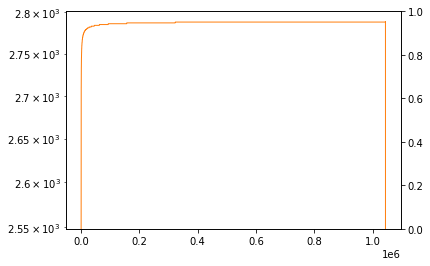

In [8]:
fig, ax = plt.subplots()
series = edge_count.groupby('count')['src_id'].count()
ax.hist(series, cumulative=True, histtype='step', bins=20000, color='tab:orange')

ax.set_yscale('log')
ax2 = ax.twinx()
# series.hist(ax=ax2, bins=20, bottom=0.1)

plt.show()

In [9]:
edge_count = edge_list.groupby(['src_id', 'dst_id', 'edge_type'])['timestamp'].count().reset_index(name='count')
edge_count

,src_id,dst_id,edge_type,count
0,10001,18724,237,1
1,10001,22417,69,1
2,10001,26829,151,1
3,10001,27005,17,1
4,10001,27718,115,1
...,...,...,...,...
7045224,9993,49801,74,1
7045225,9993,56226,198,3
7045226,9993,56226,69,2
7045227,9993,65294,108,1


In [10]:
edge_count.groupby('count')['src_id'].count()

count
1        4645965
2        1040173
3         423971
4         226194
5         139863
          ...   
15301          1
15374          1
15772          1
15837          1
16664          1
Name: src_id, Length: 1983, dtype: int64

In [11]:
print(len(edge_list))

27045268


In [12]:
series.idxmax()
series.idxmin()

537

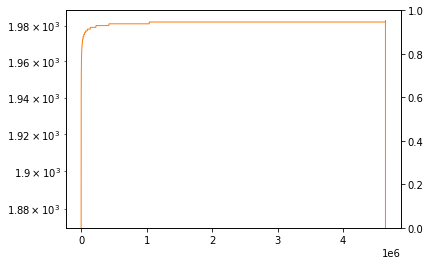

In [13]:
fig, ax = plt.subplots()
series = edge_count.groupby('count')['src_id'].count()
ax.hist(series, cumulative=True, histtype='step', bins=20000, color='tab:orange')

ax.set_yscale('log')
ax2 = ax.twinx()
# series.hist(ax=ax2, bins=20, bottom=0.1)

plt.show()